<div style='font-size: 200%; line-height: 2;'>
To participate, you'll need to git clone (or download the .zip from GitHub):

<p>https://github.com/scikit-image/skimage-tutorials</p>
</div>

<p>You can do that in git using:</p>

<pre>git clone --depth=1 https://github.com/scikit-image/skimage-tutorials</pre>

<div style='font-size: 200%; line-height: 1.5;'>
If you have already cloned the material, please issue `git pull` now and reload the notebook to ensure that you have the latest updates.
</div>

In [1]:
%matplotlib inline

# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

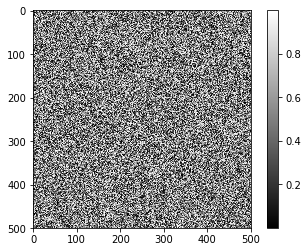

In [2]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray')
plt.colorbar();

The same holds for "real-world" images:

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


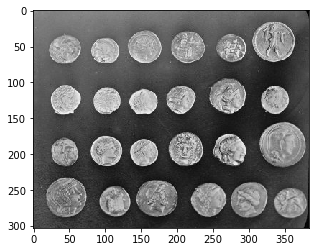

In [3]:
from skimage import data

coins = data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
print('shape:', coins.shape)

plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


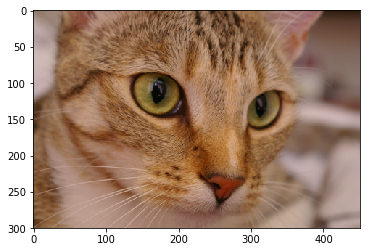

In [4]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);

These are *just NumPy arrays*. E.g., we can make a red square by using standard array slicing and manipulation:

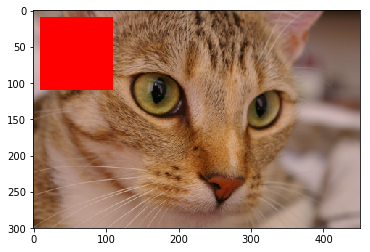

In [5]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*.

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale (or volumetric) |(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib

In [6]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

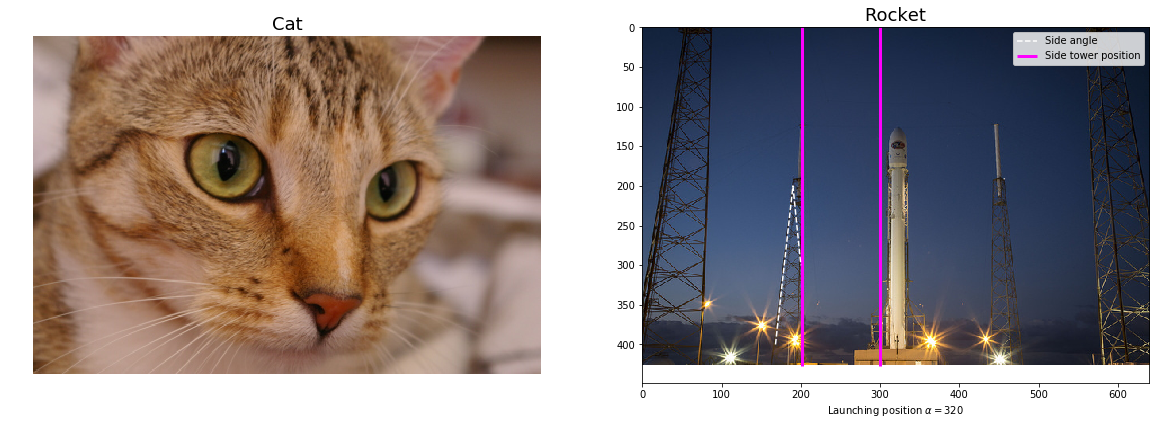

In [7]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202, 300], 0, img1.shape[0], colors='magenta', linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='white', linestyle='--', label='Side angle')

ax1.legend();

For more on plotting, see the [Matplotlib documentation](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and [pyplot API](https://matplotlib.org/api/pyplot_summary.html).

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


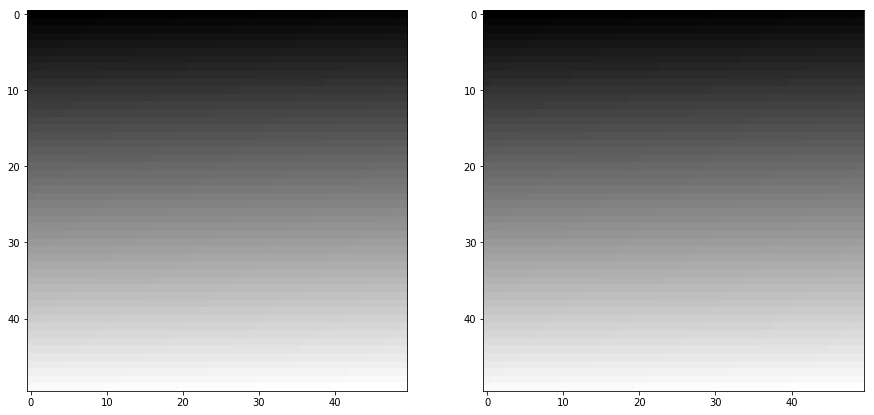

In [8]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

You can convert images between different representations by using ``img_as_float``, ``img_as_ubyte``, etc.:

In [9]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("231/255 =", 231/255.)

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

231/255 = 0.9058823529411765


Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include imageio, matplotlib, pillow, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whichever of the libraries mentioned above are installed:

<class 'numpy.ndarray'>
uint8
(300, 225, 3)
0 255


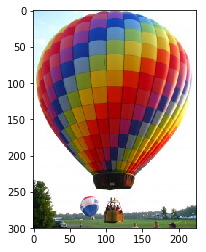

In [10]:
from skimage import io

image = io.imread('../images/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

We also have the ability to load multiple images, or multi-layer TIFF images:

In [11]:
ic = io.ImageCollection('../images/*.png:../images/*.jpg')

print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


['../images/Bells-Beach.jpg',
 '../images/balloon.jpg',
 '../images/bubbles.jpg',
 '../images/chapel_floor.png',
 '../images/chromosomes.jpg',
 '../images/clock_motion.png',
 '../images/color-wheel.jpg',
 '../images/credit_card.jpg',
 '../images/cycle_spin.png',
 '../images/fingers.png',
 '../images/forest.jpg',
 '../images/greenscreen.jpg',
 '../images/hand-coin.jpg',
 '../images/microarray.jpg',
 '../images/mm.jpg',
 '../images/mona_lisa.jpg',
 '../images/mpl_hist.png',
 '../images/round_pill.jpg',
 '../images/snakes.png',
 '../images/spice_1.jpg',
 '../images/spices.jpg',
 '../images/stefan.jpg',
 '../images/superprom_prev.jpg',
 '../images/zebrafish-spinal-cord-color.png',
 '../images/zebrafish-spinal-cord.png']

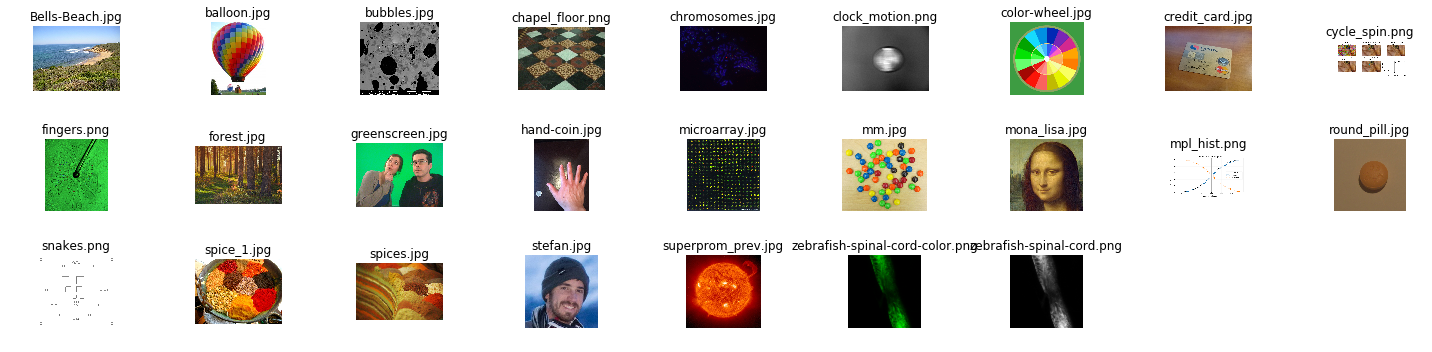

In [12]:
import os

f, axes = plt.subplots(nrows=3, ncols=len(ic) // 3 + 1, figsize=(20, 5))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

### Aside: `enumerate`

`enumerate` gives us each element in a container, along with its position.

In [13]:
animals = ['cat', 'dog', 'leopard']

In [14]:
for i, animal in enumerate(animals):
    print('The animal in position {} is {}'.format(i, animal))

The animal in position 0 is cat
The animal in position 1 is dog
The animal in position 2 is leopard


## <span class="exercize">Exercise: draw the letter H</span>

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns a copy with a green letter H overlaid at those coordinates. The coordinates point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [15]:
def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()#cria copia da imagem
    x0 = coords[1]#linha do h
    y0 = coords[0]#coluna do h
    height = 24
    width = 20
    thickness = 3
    out[y0:y0+height, x0:x0+thickness] = color #Cria a haste vertical esquerda do h
    out[y0+int(height/2):y0+int(height/2)+thickness, x0:x0+width] = color #Cria a haste horizontal do h
    out[y0:y0+height, x0+width:x0+width+thickness] = color #Cria a haste vertical direita do h
    return out 

Test your function like so:

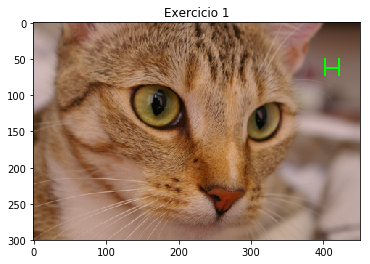

In [22]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
figure, axis = plt.subplots(1,1)
axis.set_title('Exercicio 1')
axis.imshow(cat_H)


## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template:

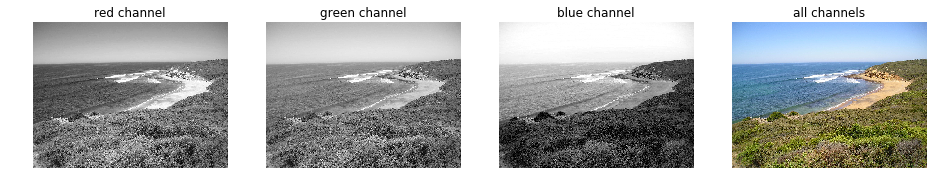

In [17]:
# --- read in the image ---

image = plt.imread('../images/Bells-Beach.jpg')

# --- assign each color channel to a different variable ---

r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

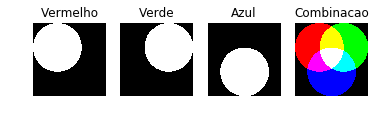

In [25]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.circle(100, 100, 100)
red[r, c] = 1

r, c = draw.circle(100, 200, 100)
green[r, c] = 1

r, c = draw.circle(200, 150, 100)
blue[r, c] = 1

combination = np.stack([red, green, blue], axis=2)#sobrepoe as 3 camadas

f, axes = plt.subplots(1, 4)
for (ax, channel, title) in zip(axes, [red, green, blue, combination], ['Vermelho','Verde','Azul','Combinacao']):
    ax.set_title(title)
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

## Exercise: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

Text(0.5, 1.0, 'Media aritmetica')

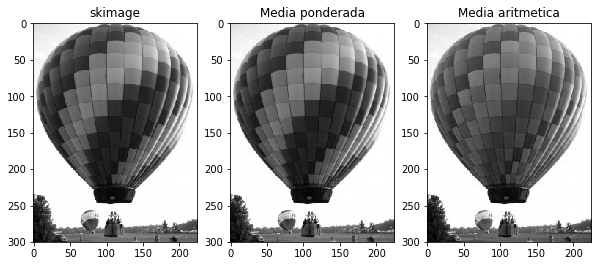

In [27]:
from skimage import color, img_as_float

image = img_as_float(io.imread('../images/balloon.jpg'))
red = image[:,:, 0]
green = image[:,:, 1]
blue = image[:,:, 2]

gray = color.rgb2gray(image)
my_gray = image @ [0.2126, 0.7152, 0.0722]
my_2nd_gray = image @ [0.3333, 0.3333, 0.3333]

# --- display the results ---

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('Media ponderada')

ax2.imshow(my_2nd_gray, cmap='gray')
ax2.set_title('Media aritmetica')